# Recurrent Neural Network
- This type of NN takes the sequence of data into account when it is learning/training.
- In the case of classifier for text, the order of the words appear in the sentence doesn't really matter
> **The sentiment was determined by the vector that resulted in adding up all the individual vectors for the individual words.**
> Direction of that vectors gave us the sentiments

### Generating text
- Ordering of the words in the sentence matters.
> e.g. : Today the weather is gorgeous and I see a beautiful blue ........
To predict next words ordering matters, and the context mattershere for what is being talk about in the sentence

### Fitting to NN
- How sequence list data is changed to sequential data
1. NN For classification or regression, involves a function that takes the data and labels and it infers the rules that fits the data to the labels.
- **f(data,labels) = Rules**
- But here no sequencing is followed

<img src = "modelML.png" align="left" style="width:350px; height:200px"/>

# RNN

- In RNN there is a function that gets an input value that produces an output value
- In addition to the output, it **also produces another feed-forward value that gets passed to the next neuron.**

<img src = "RNN.png" align="left" style=" width:150px; height:350px"/>
<img src = "RNN_Working.png" align="center" style=" width:450px; height:350px"/>

- **`Left figure`** shows a basic unit of RNN and the **`Right figure`** shows RNN working

## RNN_working

- Model gets the input x0 and output y0 and a feed forward value which is passed to the next neuron.
- Similarly x1 is feed along with the feed forward value from the previous neuron and calculates y1 and so on
- Thus sequence is encoded into the outputs, and this recurrence of data provides it name to Recurrent Neural Network.

# LSTM (Long Short Term Sequence)

### How Sequencing of words can be done as the context spreads

- The number at position 1 has very little impact at the position 100


- **`Example:`** I lived in Ireland, so at school they made me learn how to speak __.......__.
> One may answer Irish, but correct answer is Gaelic
> the key word for better prediction is used at very much before in the sentence i.e **`Ireland`**


 - RNN passes context of previous word only but the context of initial words is somhow lost.
 
 - LSTM architecture help in retaining the contextual meaning over long sentences also as it introduces **`cell_state`** which is the **context that can be maintain across many timestamps and which can bring meaning from the beginning of the sentence to bear.**
 
- It can also be **`Bidirectional`**, in which the later part of the sentence could also provide context to earlier words present in the sentence. So that we can learn the semantics of the words more accurately


In [1]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size,64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])


In [2]:
#stacking Extra LSTM layer

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(tokenizer.vocab_size,64),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64), return_sequences=True),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32))
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

### Importing Required Libraries

In [3]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Bidirectional,LSTM

from tensorflow.keras.optimizers import Adam

In [4]:
tokenizer = Tokenizer()

data = open('irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)

#as we are using an out of vocabulary token,
# we have added 1 to the wordindex 
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

###  Why we are not just encoding out of vocabulary token?

- **When generating text we dont need a validation data set**, we are going to use every bit we have to try to spot the patterns of where and how words occur.

- so if we tokenize the entire corpus then there will be no out of vocabulary token

In [5]:
## Now we have list of sentences, which we have tokenized
# Turning sentences into a set of training data

input_sequences = []

for line in corpus:
    #creating token for each line in the corpus
    token_list = tokenizer.texts_to_sequences([line])[0]
    #generating n_grams from the token_list
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        

### Note :
- We are not doing text_to_sequences for entire body here
- After creating token_list, then we will go through this list and Generate n_grams from that

<img src = "n_gram_seq.png" align="left" style=" width:350px; height:200px"/>

- Tokenized line is represented by a list of numbers,
- we can split that list into a number of other lists, 1st 2word, 1st 3word,......., 1st n word
- Reason is simple as we want to predict the next word,
- so for each sentences we have, we can train it

In [6]:
## pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))

print(input_sequences[0:10])
print(input_sequences.shape)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    51   12]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0   51
    12   96]
 [   0    0    0    0    0    0    0    0    0    0    0    0   51   12
    96 1217]
 [   0    0    0    0    0    0    0    0    0    0    0   51   12   96
  1217   48]
 [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
    48    2]
 [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
     2   69]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     2   11]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    2
    11   15]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2   11
    15   31]
 [   0    0    0    0    0    0    0    0    0    0    0    2   11   15
    31  361]]
(12038, 16)


In [7]:
# create predictors and label
# column from starting to n-1 is selected as features
# last column is selected as labels else seleced as feature(x's)

xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

#We want our labels(ys) to be categorical and should be 1-hot encoded
#so that when we train we would be able to predict across all of the words in our corpus. 
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# MODEL TRAINING

- As their is very high variation of wods, we have taken the dimension to be 100.
- since we have slice last value to be our label hence max_sequence_len is 1 less than the original
- applied Bidirectional LSTM
- output is a dense layer, with the total no of words
- **`NOTE`** : Labels are 1-Hot encoded

In [8]:
model = Sequential()
model.add(Embedding(total_words,100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation = 'softmax'))

adam = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs,ys, epochs=100, verbose = 1)

Epoch 1/100


C:\Users\hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


377/377 [==============================] - 30s 60ms/step - loss: 6.5615 - accuracy: 0.0792
Epoch 2/100
377/377 [==============================] - 22s 60ms/step - loss: 5.6098 - accuracy: 0.1254
Epoch 3/100
377/377 [==============================] - 20s 53ms/step - loss: 4.6766 - accuracy: 0.1779
Epoch 4/100
377/377 [==============================] - 21s 55ms/step - loss: 3.7480 - accuracy: 0.2576
Epoch 5/100
377/377 [==============================] - 22s 58ms/step - loss: 2.9124 - accuracy: 0.3699
Epoch 6/100
377/377 [==============================] - 22s 58ms/step - loss: 2.3060 - accuracy: 0.4759
Epoch 7/100
377/377 [==============================] - 22s 58ms/step - loss: 1.8358 - accuracy: 0.5684
Epoch 8/100
377/377 [==============================] - 23s 60ms/step - loss: 1.4900 - accuracy: 0.6443
Epoch 9/100
377/377 [==============================] - 23s 62ms/step - loss: 1.2927 - accuracy: 0.6906
Epoch 10/100
377/377 [==============================] - 23s 60ms/step - loss: 1.1451 

Epoch 80/100
377/377 [==============================] - 17s 45ms/step - loss: 0.8939 - accuracy: 0.7681
Epoch 81/100
377/377 [==============================] - 17s 45ms/step - loss: 0.9346 - accuracy: 0.7608
Epoch 82/100
377/377 [==============================] - 17s 44ms/step - loss: 0.9148 - accuracy: 0.7632
Epoch 83/100
377/377 [==============================] - 17s 44ms/step - loss: 0.8800 - accuracy: 0.7708
Epoch 84/100
377/377 [==============================] - 17s 44ms/step - loss: 0.8726 - accuracy: 0.7684
Epoch 85/100
377/377 [==============================] - 17s 45ms/step - loss: 0.8345 - accuracy: 0.7769
Epoch 86/100
377/377 [==============================] - 17s 44ms/step - loss: 0.8061 - accuracy: 0.7860
Epoch 87/100
377/377 [==============================] - 17s 44ms/step - loss: 0.8107 - accuracy: 0.7885
Epoch 88/100
377/377 [==============================] - 17s 44ms/step - loss: 0.8212 - accuracy: 0.7843
Epoch 89/100
377/377 [==============================] - 16s 43ms

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           269000    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
print(model)

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

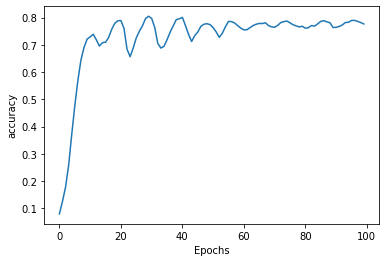

In [11]:
plot_graphs(history, 'accuracy')

In [23]:
seed_text = "Twinkle, twinkle, little star, How I wonder what you are!"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

1/1 [==============================] - 0s 60ms/step


In [24]:
print(seed_text)

Twinkle, twinkle, little star, How I wonder what you are! meet me my bride by moonlight has gone more childer they gone gone rose alas i reached thee meet me with a slumber kind im dead as well love you love gone gone gone gone gone gone i an i love gone chance beside forgot guard half gallon bottles drove me scarce hanging thinking over the loved and jolly i bride by gilgarra kilgary wild eer the love light gone alas i for many many while merry mothers raw by the river flow gently along the banks of ban complexions i in your toe for love me gone and i
